- number of cores, set this number according to your computer

In [49]:
from helper import *
from stats import *
from product_info import *
from imp import reload  
import helper
import stats
reload(helper)
reload(stats)


<module 'stats' from 'C:\\Users\\dell\\stats.py'>

- sample product, you can change to your specific product symbol

In [50]:
product_list = ["btc.usd.td", "eth.usd.td", "btc.usdt", "eth.usdt"]
product = product_list[0]

In [51]:
import dask
from dask import compute, delayed

In [52]:
CORE_NUM = int(os.environ['NUMBER_OF_PROCESSORS'])
CORE_NUM
## 16

16

- get the list of this form

In [53]:
ORI_PATH = HEAD_PATH+"/ori pkl/"
all_dates = list(map(lambda x: x,os.listdir(ORI_PATH + product_list[0])))
n_days = len(all_dates)
n_days
## 1061

1061

- number of days

In [54]:
all_dates[:6]
# ['2017-06-16.pkl',
#  '2017-06-17.pkl',
#  '2017-06-18.pkl',
#  '2017-06-19.pkl',
#  '2017-06-20.pkl',
#  '2017-06-21.pkl']

['2017-06-16.pkl',
 '2017-06-17.pkl',
 '2017-06-18.pkl',
 '2017-06-19.pkl',
 '2017-06-20.pkl',
 '2017-06-21.pkl']

- some days may have error because of rolling contracts

- we randomly choose a day

In [43]:
## use 10k data of previous day, and 10k data of next day, to merge them together
def merge_data(i, product, all_dates, num):
    cur_data = load(ORI_PATH+product+"/"+all_dates[i]) ## read current day
    pre_data = load(ORI_PATH+product+"/"+all_dates[i-1])
    post_data = load(ORI_PATH+product+"/"+all_dates[i+1])
    if os.path.exists(DATA_PATH+product+"/"+all_dates[i]):
        return
    pre_data["good"] = False
    if len(pre_data)>num: ## use 10k data of previous day, if not enough, then use all of them
        data = pre_data[-num:]
    else:
        data = pre_data
    cur_data["good"] = True
    data = data.append(cur_data)
    post_data["good"] = False
    if len(post_data)>num: ## use 10k data of next day, if not enough, then use all of them
        data = data.append(post_data[0:num])
    else:
        data = data.append(post_data)
    save(data, DATA_PATH+product+"/"+all_dates[i])

In [44]:
ok_dates = set(map(lambda x: x,os.listdir(DATA_PATH + product))) ## all available dates

In [45]:
all_dates = list(map(lambda x: x,os.listdir(ORI_PATH + product))) ## all available dates
ok_dates = set(map(lambda x: x,os.listdir(DATA_PATH + product))) ## all available dates
i_range = np.array(range(len(all_dates))) ## cut the first and last day
parLapply(CORE_NUM, i_range, merge_data, product=product, all_dates=all_dates, num=10000)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [36]:
product = "btc.usdt"
all_dates = list(map(lambda x: x,os.listdir(ORI_PATH + product))) ## all available dates
ok_dates = list(map(lambda x: x,os.listdir(DATA_PATH + product))) ## all available dates
i_range = np.array(range(len(all_dates))) ## cut the first and last day

In [41]:
merge_data(11, product, all_dates, 10000)

In [39]:
all_dates[11]

'2019-09-28.pkl'

In [42]:
np.where(all_dates=='2020-03-04.pkl')

(array([], dtype=int64),)

In [24]:
%%time
for product in product_list[3:]:
    print(product)
    all_dates = list(map(lambda x: x,os.listdir(ORI_PATH + product))) ## all available dates
    i_range = np.array(range(len(all_dates))) ## cut the first and last day
    parLapply(CORE_NUM, i_range, merge_data, product=product, all_dates=all_dates, num=10000)

eth.usdt
Wall time: 4min 44s


In [85]:
%%time
for product in product_list:
    merge_data(product, 10000)
;

'btc.usd.td'

- plot all the data

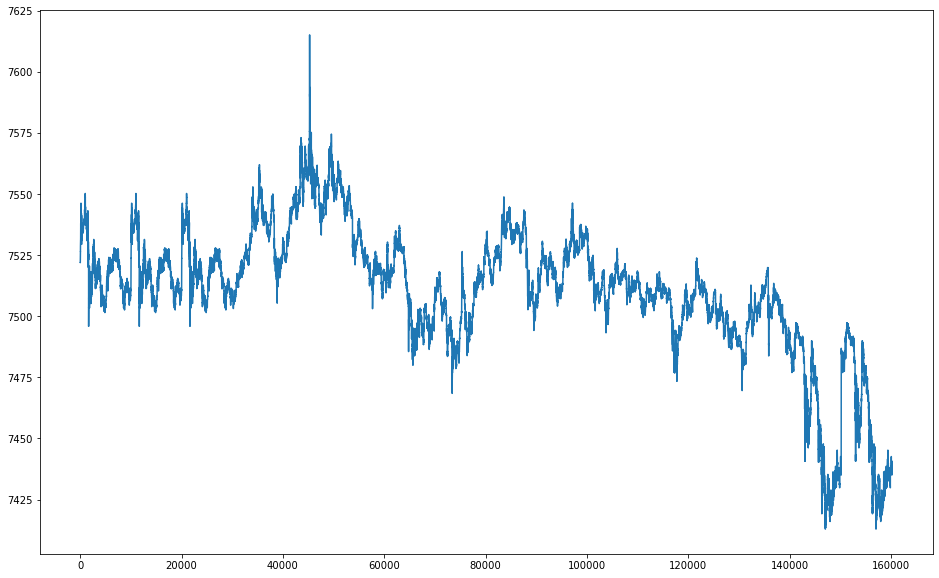

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

data = load(DATA_PATH + product_list[2] + "/"+all_dates[10])
plt.figure(1, figsize=(16, 10))
plt.plot(data["wpr"].values);

- Welcome to Quantitative and High Frequency Trading Training Program


- now we need to add 1 hour to the beginning and end of every day's data

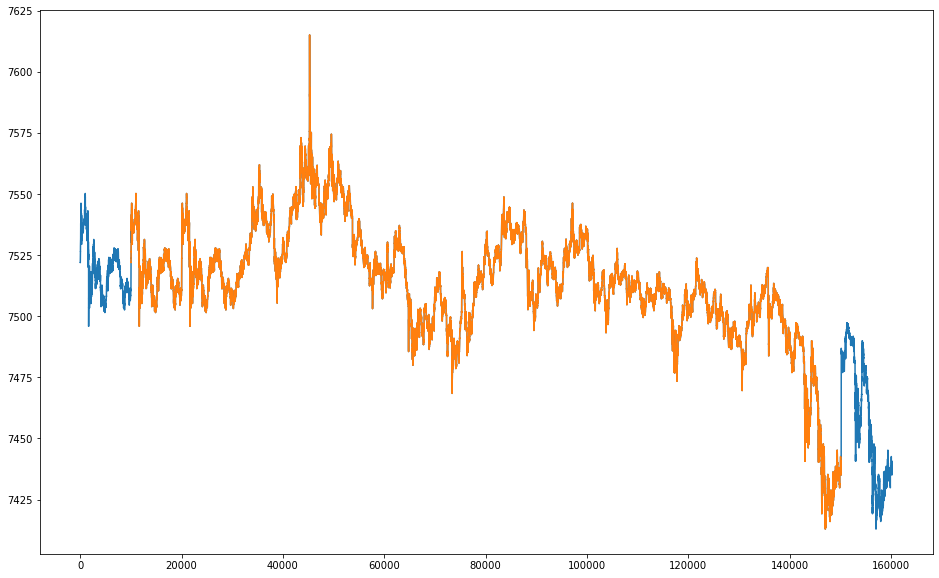

In [26]:
plt.figure(1, figsize=(16, 10))
plt.plot(data.reset_index()["wpr"]);
plt.plot(data.reset_index()[data.reset_index()["good"]]["wpr"]);

- number of usable points

In [18]:
sum(data["good"])
## 100497

100497

- total number of two days

In [19]:
len(data)
## 120497

120497

- so we only use the middle part of the data


- test the first predictive signal
- we can use look-back period of 4096 at first

In [15]:
period = 4096

- the first signal is the buy/sell imbalance signal


- create directory for all signals

- create directory for the product

In [16]:
SAVE_PATH = "e:/intern"

In [17]:
import os
for product in product_list:
    os.makedirs(SAVE_PATH + "/tmp pkl/" + product, exist_ok=True)

- create directory for the signal

- now let's check the signal


- it's the buy/sell imbalance of one tick

- zero_divide is zero when denominator is zero
- we can see the definition of zero_divide in helper.py


- returns 0 if the numerator or denominator is 0

In [15]:
def zero_divide(x, y):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        res = np.divide(x,y)
    if hasattr(y, "__len__"):
        res[y == 0] = 0
    elif y == 0:
        res = 0
        
    return res

In [64]:
## calculate the range of price
## there may be several periods of range here, divided by spread
## look-back periods are in period_list
## typically, 1024, 2048, 4096
## for index futures, 1024 may be useful
## for black commodities, 2048 may be useful
## for other commodities, 4096 may be useful
## here we use 4096
## reason to dvided by spread is to normalize the result
## because our trading cost mainly come from bid/ask spread
def get_atr(file, product, period_list, spread):
    data = load(file)
    for period in period_list:
        S = (data["max."+str(period)]-data["min."+str(period)])/spread
        save(S, SAVE_PATH+"/tmp pkl/"+product+"/atr."+str(period)+"/" + file[-12:])

In [65]:
## calculate exponential moving avergae
## may different from python's ewm
## warning: adjust is NOT the adjust of ewm
## the adjust of ewm is ALWAYS False
## look-back period is halflife in ewma
## halflife is the period of alpha decay to half
## this is only one method to calculate ewma, there are others, suchas (n-1)/(n+1) and 2/(n+1)
## if adjust=false, the first (period-1) values may be too large
## so we use adjust=true to adjust it, it's divided by aa
## and the first (period-1) values are normal in value
def ewma(x, halflife, init=0, adjust=False):
    init_s = pd.Series(data=init)
    s = init_s.append(x)
    if adjust:
        xx = range(len(x))
        lamb=1 - 0.5**(1 / halflife)
        aa=1-np.power(1-lamb, xx)*(1-lamb)
        bb=s.ewm(halflife=halflife, adjust=False).mean().iloc[1:]
        return bb/aa
    else:
        return s.ewm(halflife=halflife, adjust=False).mean().iloc[1:]

In [55]:
## to calculate the normalized return
## class of factor
## 3 parts: factor_name, params, formula
## 2^[10:13]=(1024,2048,3096)
## the idea is ret/|ret|
## then over a period, we divided by period in numerator and denominator
## (ret/period)/(|ret|/period)
## then we use ewma(ret)/ewma(|ret|) instead of mean return
## because calculate ewma is faster and easier
## but the first period items may not be correct for ewma
## so we use adjust=True
## but since there is avdivision, actually we don't need to use adjust=True
## they would be the same with or withour adjust=True
from collections import OrderedDict
class foctor_nr_period(factor_template):
    factor_name = "nr.period"
    params = OrderedDict([
        ("period", np.power(2, range(10,13)))
    ])
    def formula(self, data, period):
        return zero_divide(ewma(data["ret"], period, adjust=True), ewma(data["ret"].abs(), period, adjust=True)).values

In [61]:
## procedure to calculate a signal
## first use a variable to define the class object
x3 = foctor_nr_period()
SAVE_PATH = "e:/intern"
## then create directories to save the result
for product in product_list:
    create_signal_path(x3, product, SAVE_PATH);
    
# e:/intern/tmp pkl/btc.usd.td/nr.1024
# e:/intern/tmp pkl/btc.usd.td/nr.2048
# e:/intern/tmp pkl/btc.usd.td/nr.4096
# e:/intern/tmp pkl/eth.usd.td/nr.1024
# e:/intern/tmp pkl/eth.usd.td/nr.2048
# e:/intern/tmp pkl/eth.usd.td/nr.4096
# e:/intern/tmp pkl/btc.usdt/nr.1024
# e:/intern/tmp pkl/btc.usdt/nr.2048
# e:/intern/tmp pkl/btc.usdt/nr.4096
# e:/intern/tmp pkl/eth.usdt/nr.1024
# e:/intern/tmp pkl/eth.usdt/nr.2048
# e:/intern/tmp pkl/eth.usdt/nr.4096

e:/intern/tmp pkl/btc.usd.td/nr.1024
e:/intern/tmp pkl/btc.usd.td/nr.2048
e:/intern/tmp pkl/btc.usd.td/nr.4096
e:/intern/tmp pkl/eth.usd.td/nr.1024
e:/intern/tmp pkl/eth.usd.td/nr.2048
e:/intern/tmp pkl/eth.usd.td/nr.4096
e:/intern/tmp pkl/btc.usdt/nr.1024
e:/intern/tmp pkl/btc.usdt/nr.2048
e:/intern/tmp pkl/btc.usdt/nr.4096
e:/intern/tmp pkl/eth.usdt/nr.1024
e:/intern/tmp pkl/eth.usdt/nr.2048
e:/intern/tmp pkl/eth.usdt/nr.4096


In [62]:
product

'eth.usdt'

In [63]:
%%time 
for product in product_list:
    file_list = list(map(lambda x: DATA_PATH+product+"/"+x, os.listdir(DATA_PATH + product))) ## files of each day
    parLapply(CORE_NUM, file_list, build_composite_signal,signal_list=x3, product=product, HEAD_PATH=SAVE_PATH,n=14)
;
# Wall time: 6min 



Wall time: 23min 47s


''

- we can check the result

- we can see that they are the same
- so the signal calculation process is correct


- now calcualte all the value of this signal

In [98]:
import statsmodels.tsa.stattools as ts
import math

In [175]:
signal_name = "nr.4096"
for product in product_list:
    all_signal = np.array([])
    all_dates = list(map(lambda x: x,os.listdir(DATA_PATH + product)))
    n_days = len(all_dates)
    to_choose = np.where(np.mod(range(n_days),10)==0)
    for file in np.array(all_dates)[to_choose]:
        data = load(HEAD_PATH+"/pkl tick/"+product+"/"+file)
        S = load(SAVE_PATH+"/tmp pkl/"+product+"/"+signal_name+"/"+file)
        S = S[data["good"]]
        all_signal = np.concatenate((all_signal, S), axis=0)
    sample_signal = all_signal[np.arange(1,len(all_signal)+1)% period==0]
    result = ts.adfuller(sample_signal, maxlag=int(pow(len(sample_signal)-1,(1/3))), regression='ct', autolag=None)
    print(product, "adf", result)
    result = ts.kpss(sample_signal, regression='c', lags=int(3*math.sqrt(len(sample_signal))/13))
    print(product, "kpss", result)
    
# btc.usd.td adf (-14.286099205637587, 6.290089193086617e-22, 14, 3100, {'1%': -3.96169331751049, '5%': -3.411907199858145, '10%': -3.1278844736960827})
# btc.usd.td kpss (0.10401725246766817, 0.1, 12, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
# eth.usd.td adf (-9.291846032580738, 8.0296275989844e-14, 8, 604, {'1%': -3.9738371092027958, '5%': -3.4177838487416023, '10%': -3.1313416551164974})
# eth.usd.td kpss (0.20526361134627072, 0.1, 5, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
# btc.usdt adf (-9.202484949675226, 1.2713627396646223e-13, 9, 896, {'1%': -3.9689095031072656, '5%': -3.4154013184598027, '10%': -3.1299406344388734})
# btc.usdt kpss (0.1125797599690282, 0.1, 6, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
# eth.usdt adf (-5.709900475552685, 8.744060250147478e-06, 8, 517, {'1%': -3.9763881593235317, '5%': -3.4190162040863004, '10%': -3.132066006974478})
# eth.usdt kpss (0.21392117844312047, 0.1, 5, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


btc.usd.td adf (-14.286099205637587, 6.290089193086617e-22, 14, 3100, {'1%': -3.96169331751049, '5%': -3.411907199858145, '10%': -3.1278844736960827})
btc.usd.td kpss (0.10401725246766817, 0.1, 12, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


d:\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


eth.usd.td adf (-9.291846032580738, 8.0296275989844e-14, 8, 604, {'1%': -3.9738371092027958, '5%': -3.4177838487416023, '10%': -3.1313416551164974})
eth.usd.td kpss (0.20526361134627072, 0.1, 5, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


d:\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


btc.usdt adf (-9.202484949675226, 1.2713627396646223e-13, 9, 896, {'1%': -3.9689095031072656, '5%': -3.4154013184598027, '10%': -3.1299406344388734})
btc.usdt kpss (0.1125797599690282, 0.1, 6, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


d:\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


eth.usdt adf (-5.709900475552685, 8.744060250147478e-06, 8, 517, {'1%': -3.9763881593235317, '5%': -3.4190162040863004, '10%': -3.132066006974478})
eth.usdt kpss (0.21392117844312047, 0.1, 5, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


d:\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


- for adf, if p-valus(the second one) is small, then it's stationary;
- for kpss, if p-value is large, then it's stationary;
- so for trade.imb.4096, all of them are stationary
- now we calcualte another signal which measures the range ranther than direciton

In [66]:
for product in product_list:
    for period in [1024,2048,4096]:
        os.makedirs(SAVE_PATH + "/tmp pkl/" + product+"/atr."+str(period), exist_ok=True)

In [7]:
product_info["btc.usd.td"] = OrderedDict([("spread", 0.5), ("tranct", 7.5*1e-4), ("tranct.ratio", True), ("multiplier",1), ("close", 7.5*1e-4)])

product_info["eth.usd.td"] = OrderedDict([("spread", 0.05), ("tranct", 7.5*1e-4), ("tranct.ratio", True), ("multiplier",1), ("close", 7.5*1e-4)])

product_info["btc.usdt"] = OrderedDict([("spread", 0.01), ("tranct", 7.5*1e-4), ("tranct.ratio", True), ("multiplier",1), ("close", 7.5*1e-4)])

product_info["eth.usdt"] = OrderedDict([("spread", 0.01), ("tranct", 7.5*1e-4), ("tranct.ratio", True), ("multiplier",1), ("close", 7.5*1e-4)])

In [67]:
def add_min_max(file, period_list):
    data = load(file)
    data = data.reset_index(drop=True)
    for period in period_list:
        data["min."+str(period)] = data["wpr"].rolling(period).min()
        data.loc[:period-1, ("min."+str(period))] = data["wpr"][0]
        
        data["max."+str(period)] = data["wpr"].rolling(period).max()
        data.loc[:period-1, ("max."+str(period))] = data["wpr"][0]
    save(data, file)

In [226]:
%%time
for product in product_list:
    file_list = list(map(lambda x: DATA_PATH+product+"/"+x, os.listdir(DATA_PATH + product)))
    parLapply(CORE_NUM, file_list, add_min_max, period_list=np.power(2, range(10,13)))

## Wall time: 11min 57s


Wall time: 11min 57s


In [227]:
%%time
for product in product_list:
    spread = product_info[product]["spread"]
    file_list = list(map(lambda x: DATA_PATH+product+"/"+x, os.listdir(DATA_PATH + product)))
    parLapply(CORE_NUM, file_list, get_atr, product=product,period_list=np.power(2, range(10,13)), spread=spread) 
    
# Wall time: 3min 22s


Wall time: 3min 22s


In [68]:
def get_atr(file, product, period_list, spread, HEAD_PATH):
    data = load(file)
    for period in period_list:
        S = (data["max."+str(period)]-data["min."+str(period)])/spread
        save(S, HEAD_PATH+"/tmp pkl/"+product+"/atr."+str(period)+"/" + file[-14:])


In [69]:
for product in product_list:
    for period in [1024,2048,4096]:
        os.makedirs(SAVE_PATH + "/tmp pkl/" + product+"/atr."+str(period), exist_ok=True)

In [70]:
%%time
for product in product_list:
    spread = product_info[product]["spread"]
    file_list = list(map(lambda x: DATA_PATH+product+"/"+x, os.listdir(DATA_PATH + product)))
    parLapply(CORE_NUM, file_list, get_atr, product=product,period_list=np.power(2, range(10,13)), spread=spread, HEAD_PATH=SAVE_PATH) 


Wall time: 23min 48s


- It measures how many bid/ask spreads of range in the previous period 
- In this case, we can measure volatility of each product in similar criteron
- because slippage is the largest cost for intraday trading

- Then we can modify our backtest program to include a trend signal and a range signal

In [61]:
from collections import OrderedDict
def get_signal_pnl(file, product, signal_name, thre_mat, reverse=1, tranct=1.1e-4, max_spread=0.61, tranct_ratio=True, 
                   HEAD_PATH="d:/intern", SAVE_PATH="e:/intern", atr_filter=0):
    ## load data
    data = load(HEAD_PATH+"/pkl tick/"+product+"/"+file)
    S = load(SAVE_PATH+"/tmp pkl/"+product+"/"+signal_name+"/"+file)
    pred = S*reverse
    pred = pred[data["good"]]
    atr = load(SAVE_PATH+"/tmp pkl/"+product+"/"+"atr.4096"+"/"+file)
    atr = atr[data["good"]].reset_index(drop=True)
    data = data[data["good"]].reset_index(drop=True)
    #n_bar = len(data)
    
    ## load signal
    
    ## we don't know the signal is positive correlated or negative correlated  
    #n_thre = len(thre_mat)
    result = pd.DataFrame(data=OrderedDict([("open", thre_mat["open"].values), ("close", thre_mat["close"].values),
                               ("num", 0), ("avg.pnl", 0), ("pnl", 0), ("avg.ret", 0), ("ret", 0)]), 
                          index=thre_mat.index)
    count = 0;
    cur_spread = data["ask"]-data["bid"]
    for thre in thre_mat.iterrows():
        count = count+1
        buy = pred>thre[1]["open"]
        sell = pred<-thre[1]["open"]
        signal = pd.Series(data=0, index=data.index)
        position = signal.copy()
        signal[buy] = 1
        signal[sell] = -1
        signal[atr<atr_filter]=0
        scratch = -thre[1]["close"]
        position_pos = pd.Series(data=np.nan, index=data.index)
        position_pos.iloc[0] = 0
        position_pos[(signal==1) & (data["next.ask"]>0) & (data["next.bid"]>0) & (cur_spread<max_spread)] = 1
        position_pos[(pred< -scratch) & (data["next.bid"]>0) & (cur_spread<max_spread)] = 0
        position_pos.ffill(inplace=True)
        pre_pos = position_pos.shift(1)
        notional_position_pos = pd.Series(data=0, index=data.index)
        notional_position_pos[position_pos==1] = 1
        notional_position_pos[(position_pos==1) & (pre_pos==1)] = np.nan
        notional_position_pos[(notional_position_pos==1)] = 1/data["next.ask"][(notional_position_pos==1)]
        notional_position_pos.ffill(inplace=True)
        position_neg = pd.Series(data=np.nan, index=data.index)
        position_neg.iloc[0] = 0
        position_neg[(signal==-1) & (data["next.ask"]>0) & (data["next.bid"]>0) & (cur_spread<max_spread)] = -1
        position_neg[(pred> scratch) & (data["next.ask"]>0) & (cur_spread<max_spread)] = 0
        position_neg.ffill(inplace=True)
        pre_neg = position_neg.shift(1)
        notional_position_neg = pd.Series(data=0, index=data.index)
        notional_position_neg[position_neg==-1] = -1
        notional_position_neg[(position_neg==-1) & (pre_neg==-1)] = np.nan
        notional_position_neg[(notional_position_neg==-1)] = -1/data["next.bid"][(notional_position_neg==-1)]
        notional_position_neg.ffill(inplace=True)
        position = position_pos + position_neg
        notional_position = notional_position_pos+notional_position_neg
        #position[n_bar-1] = 0
        position.iloc[0] = 0
        position.iloc[-2:] = 0
        notional_position.iloc[0] = 0
        notional_position.iloc[-2:] = 0
        change_pos = position - position.shift(1)
        notional_change_pos = notional_position-notional_position.shift(1)
        change_pos.iloc[0] = 0
        notional_change_pos.iloc[0] = 0
        change_base = pd.Series(data=0, index=data.index)
        change_buy = change_pos>0
        change_sell = change_pos<0
        if (tranct_ratio):
            change_base[change_buy] = data["next.ask"][change_buy]*(1+tranct)
            change_base[change_sell] = data["next.bid"][change_sell]*(1-tranct)
        else:
            change_base[change_buy] = data["next.ask"][change_buy]+tranct
            change_base[change_sell] = data["next.bid"][change_sell]-tranct
        final_pnl = -sum(change_base*change_pos)
        ret = -sum(change_base*notional_change_pos)
        num = sum((position!=0) & (change_pos!=0))
        if num == 0:
            result.loc[thre[0], ("num", "avg.pnl", "pnl", "avg.ret", "ret")] = (0,0,0,0,0)
            return result
        else:
            avg_pnl = np.divide(final_pnl, num)
            avg_ret = np.divide(ret,num)
            result.loc[thre[0], ("num", "avg.pnl", "pnl", "avg.ret", "ret")] = (num, avg_pnl, final_pnl, avg_ret,ret)
    return result

- First we want to know the range of signal

In [31]:

## chooose one day out of 10 days
signal_name = "nr.4096"
all_product_signal = dict([])
for product in product_list:
    all_dates = list(map(lambda x: x,os.listdir(DATA_PATH + product)))
    n_days = len(all_dates)
    to_choose = (np.arange(n_days)+1) % 10 == 0
    all_signal = np.array([])
    for file in np.array(all_dates)[to_choose]:
        data = load(HEAD_PATH+"/pkl tick/"+product+"/"+file)
        S = load(SAVE_PATH+"/tmp pkl/"+product+"/"+signal_name+"/"+file)
        S = S[data["good"]]
        all_signal = np.concatenate((all_signal, S), axis=0)
    all_product_signal[product] = all_signal

- we can plot the range together in one graph

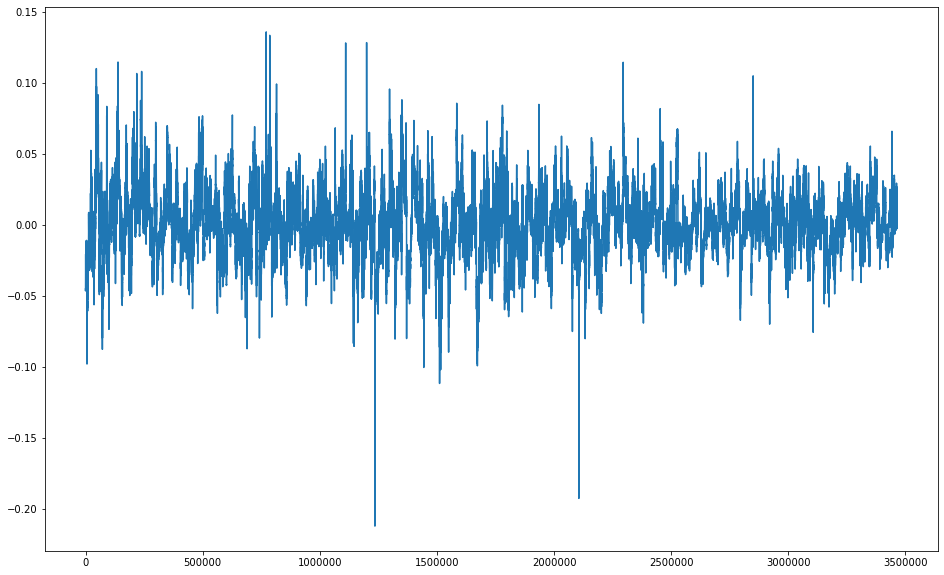

In [35]:
product = "btc.usdt"
plt.figure(1, figsize=(16, 10))
plt.plot(all_product_signal[product]);

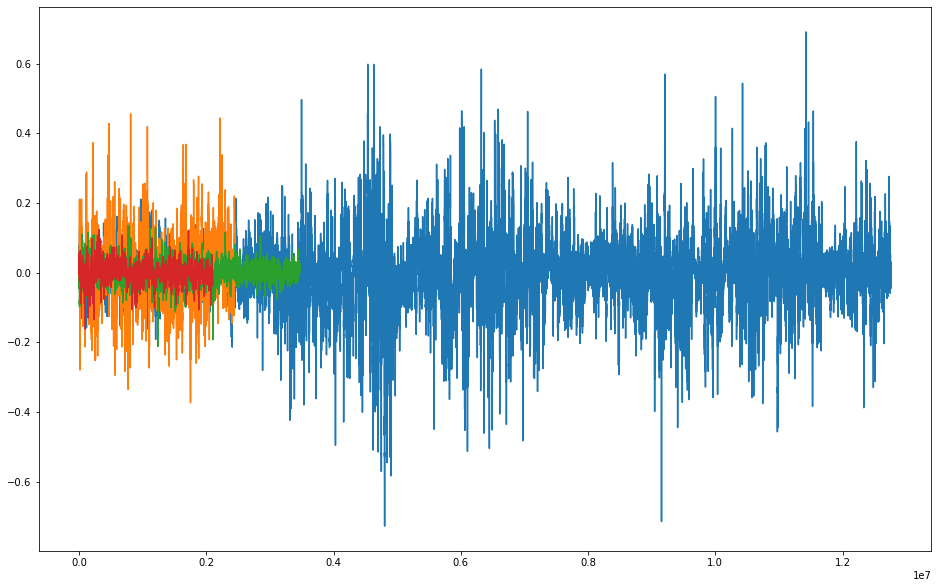

In [230]:
for product in product_list:
    plt.figure(1, figsize=(16, 10))
    plt.plot(all_product_signal[product]);

In [57]:
from collections import OrderedDict
import itertools
open_list = np.arange(0.2, 0.6, 0.02)
thre_list = []
for cartesian in itertools.product(open_list, np.array([0.2, 0.4, 0.6, 0.8, 1.0])):
    thre_list.append((cartesian[0], -cartesian[0] * cartesian[1]))
thre_list = np.array(thre_list)
bitmex_thre_mat = pd.DataFrame(data=OrderedDict([("open", thre_list[:, 0]), ("close", thre_list[:, 1])]))
bitmex_thre_mat

,open,close
0,0.20,-0.040
1,0.20,-0.080
2,0.20,-0.120
3,0.20,-0.160
4,0.20,-0.200
...,...,...
95,0.58,-0.116
96,0.58,-0.232
97,0.58,-0.348
98,0.58,-0.464


In [58]:
from collections import OrderedDict
import itertools
open_list = np.arange(0.06, 0.1, 0.002)
thre_list = []
for cartesian in itertools.product(open_list, np.array([0.2, 0.4, 0.6, 0.8, 1.0])):
    thre_list.append((cartesian[0], -cartesian[0] * cartesian[1]))
thre_list = np.array(thre_list)
binance_thre_mat = pd.DataFrame(data=OrderedDict([("open", thre_list[:, 0]), ("close", thre_list[:, 1])]))
binance_thre_mat

,open,close
0,0.06,-0.012
1,0.06,-0.024
2,0.06,-0.036
3,0.06,-0.048
4,0.06,-0.060
...,...,...
100,0.10,-0.020
101,0.10,-0.040
102,0.10,-0.060
103,0.10,-0.080


- then at the quantile values

In [9]:
from collections import OrderedDict
def get_hft_summary(result, thre_mat, n):
    all_result = pd.DataFrame(data={"daily.result": result})
    daily_num = all_result['daily.result'].apply(lambda x: x["num"])
    daily_pnl = all_result['daily.result'].apply(lambda x: x["pnl"])
    daily_ret = all_result['daily.result'].apply(lambda x: x["ret"])
    total_num = daily_num.sum()
    if len(total_num) != len(thre_mat):
        raise selfException("Mismatch!")
    total_pnl = daily_pnl.sum()
    total_ret = daily_ret.sum()
    avg_pnl = zero_divide(total_pnl, total_num)
    avg_ret = zero_divide(total_ret, total_num)
    total_sharp = sharpe(daily_pnl)
    total_drawdown = drawdown(daily_pnl)
    total_max_drawdown = max_drawdown(daily_pnl)
    sharpe_ret = sharpe(daily_ret)
    drawdown_ret = drawdown(daily_ret)
    max_drawdown_ret = max_drawdown(daily_ret)
    final_result = pd.DataFrame(data=OrderedDict([("open", thre_mat["open"]), ("close", thre_mat["close"]), ("num", total_num),
                                                 ("avg.pnl", avg_pnl), ("total.pnl", total_pnl), ("sharpe", total_sharp), 
                                                 ("drawdown", total_drawdown), ("max.drawdown", total_max_drawdown), 
                                                  ("avg.ret", avg_ret), ("total.ret",total_ret), ("sharpe.ret", sharpe_ret),
                                                  ("drawdown.ret", drawdown_ret), ("max.drawdown.ret", max_drawdown_ret),
                                                 ("mar", total_pnl/total_max_drawdown), ("mar.ret", total_ret/max_drawdown_ret)]), 
                                index=thre_mat.index)
    return OrderedDict([("final.result", final_result), ("daily.num", daily_num), ("daily.pnl", daily_pnl), ("daily.ret", daily_ret)])


In [16]:
SAVE_PATH

'e:/intern'

In [87]:
%%time
signal_name = "nr.4096"
all_trade_stat = dict([])
for product in product_list:
    spread = product_info[product]["spread"]
    tranct = product_info[product]["tranct"]
    tranct_ratio = product_info[product]["tranct.ratio"]
    all_dates = list(map(lambda x: x,os.listdir(DATA_PATH + product)))
    n_days = len(all_dates)
        thre_mat = bitmex_thre_mat
    elif (product=="btc.usdt" or product=="eth.usdt"):
        thre_mat = binance_thre_mat
    with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
        f_par = functools.partial(get_signal_pnl, product=product, signal_name=signal_name, thre_mat=thre_mat,
                                 reverse=1, tranct=tranct, max_spread=spread*1.1, tranct_ratio=tranct_ratio, 
                                HEAD_PATH=HEAD_PATH, SAVE_PATH=SAVE_PATH,atr_filter=20)
        result = compute([delayed(f_par)(file) for file in all_dates])[0]
    trade_stat = get_hft_summary(result, thre_mat, n_days)
    all_trade_stat[product] = trade_stat

Wall time: 13min 58s


In [43]:
save(all_trade_stat, HEAD_PATH+"/"+"crypto_trade_stat_nr_4096.pkl")

In [108]:
#save(all_trade_stat, HEAD_PATH+"/"+"finance_trade_stat_r_trade_imb_4096.pkl")

- it seems the signal value leans to negative

- for example we care about the average pnl

In [20]:
all_trade_stat = load(HEAD_PATH+"/"+"crypto_trade_stat_nr_4096.pkl")

In [51]:
product = "btc.usdt"
all_dates = list(map(lambda x: x,os.listdir(DATA_PATH + product)))
date_str = [n[0:10] for n in all_dates]

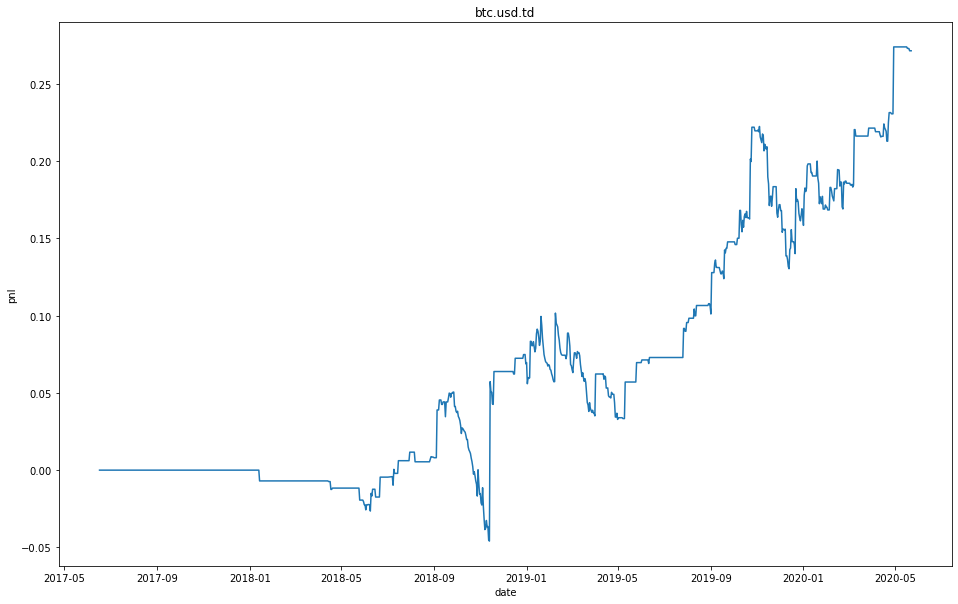

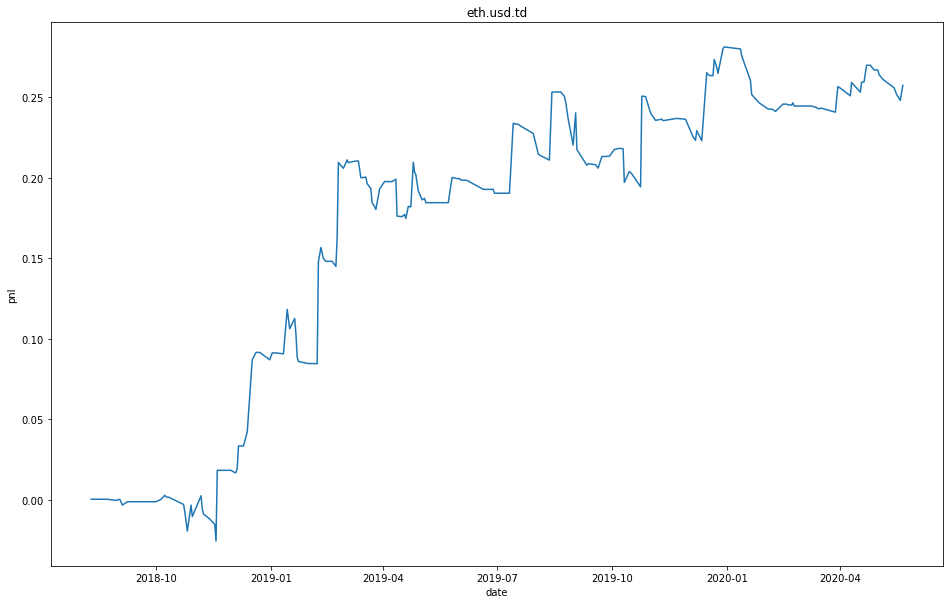

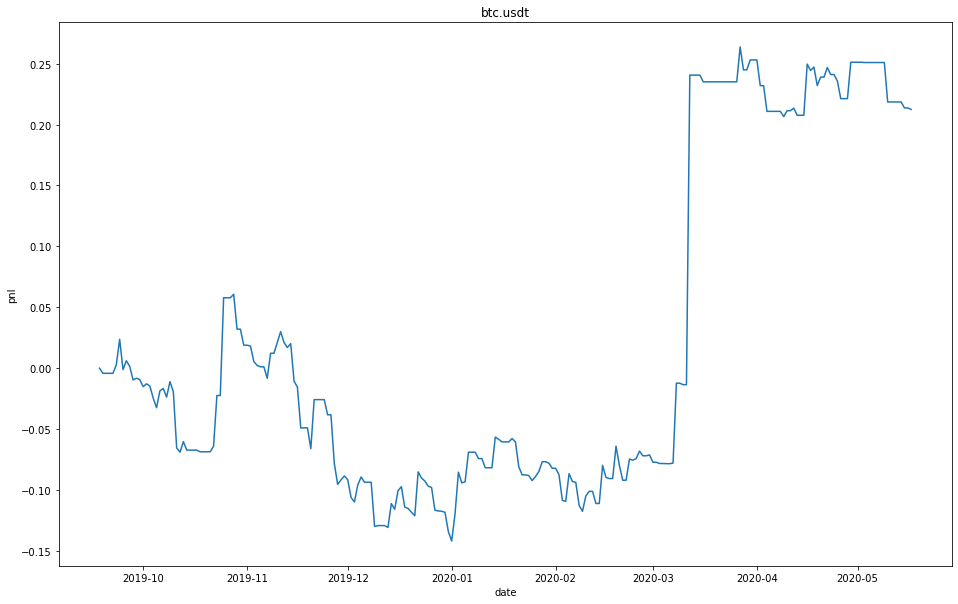

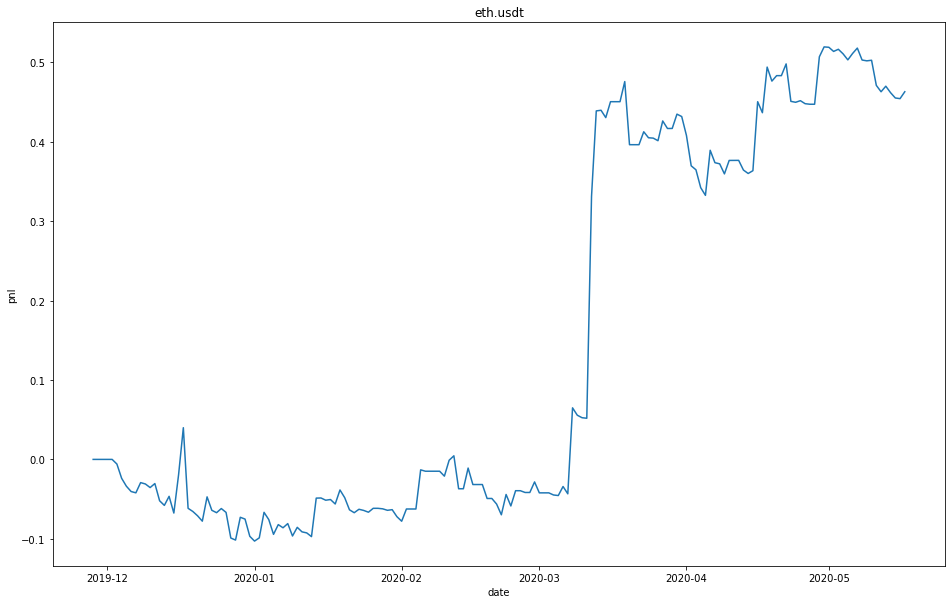

In [53]:
i = 0
for product in product_list:
    spread = product_info[product]["spread"]
    trade_stat = all_trade_stat[product]
    good_strat = trade_stat["final.result"]["avg.ret"]>0.001
    good_pnl = trade_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    all_dates = list(map(lambda x: x,os.listdir(DATA_PATH + product)))
    date_str = [n[0:10] for n in all_dates]
    format_dates = np.array([pd.to_datetime(d) for d in date_str])
    i = i+1
    plt.figure(i, figsize=(16, 10));
    plt.title("");
    plt.xlabel("date");
    plt.ylabel("pnl");
    plt.title(product);
    plt.plot(format_dates, good_pnl.cumsum());

- get training samples

- now let's see the in-sample and out-of-sample performance


- the previous result used the whole data set 
- so it may be more optimistic than reality
- now we split the data into training sample and test sample


- at first let's remain 2018 as out-of-sample

- number of training samples

In [68]:
%%time
signal_name = "nr.4096"
train_trade_stat = dict([])
for product in product_list:
    spread = product_info[product]["spread"]
    tranct = product_info[product]["tranct"]
    tranct_ratio = product_info[product]["tranct.ratio"]
    all_dates = np.array(list(map(lambda x: x,os.listdir(DATA_PATH + product))))
    date_str = [n[0:10] for n in all_dates]
    format_dates = np.array([pd.to_datetime(d) for d in date_str])
    train_sample = all_dates<"2020"
    if (product=="btc.usd.td" or product=="eth.usd.td"):
        thre_mat = bitmex_thre_mat
    elif (product=="btc.usdt" or product=="eth.usdt"):
        thre_mat = binance_thre_mat
    with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
        f_par = functools.partial(get_signal_pnl, product=product, signal_name=signal_name, thre_mat=thre_mat,
                                 reverse=1, tranct=tranct, max_spread=spread*1.1, tranct_ratio=tranct_ratio, 
                                HEAD_PATH=HEAD_PATH, SAVE_PATH=SAVE_PATH,atr_filter=20)
        result = compute([delayed(f_par)(file) for file in all_dates[train_sample]])[0]
    trade_stat = get_hft_summary(result, thre_mat, sum(train_sample))
    train_trade_stat[product] = trade_stat
    


Wall time: 16min 16s


In [69]:
save(train_trade_stat, HEAD_PATH+"/crypto_train_trade_stat.pkl")

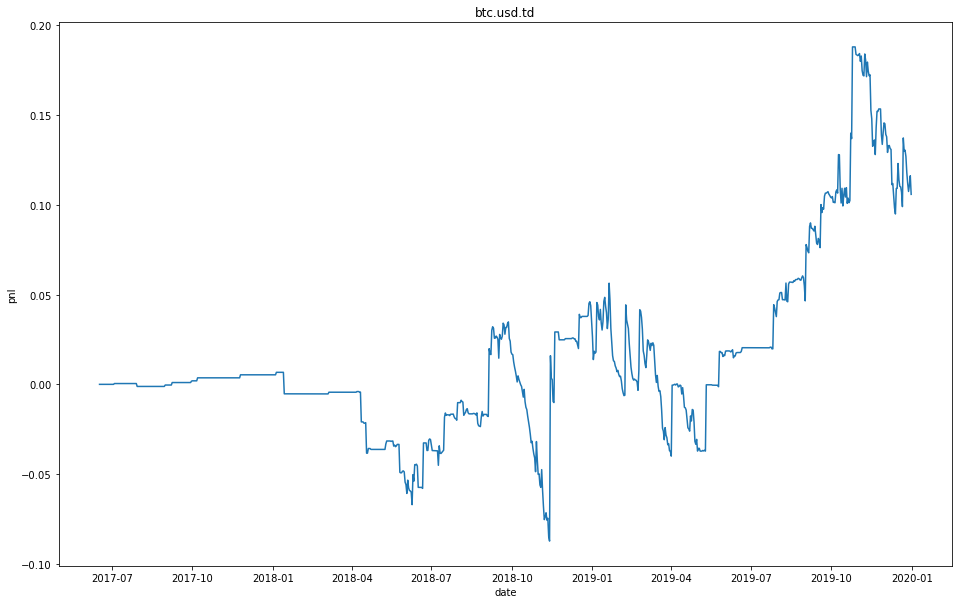

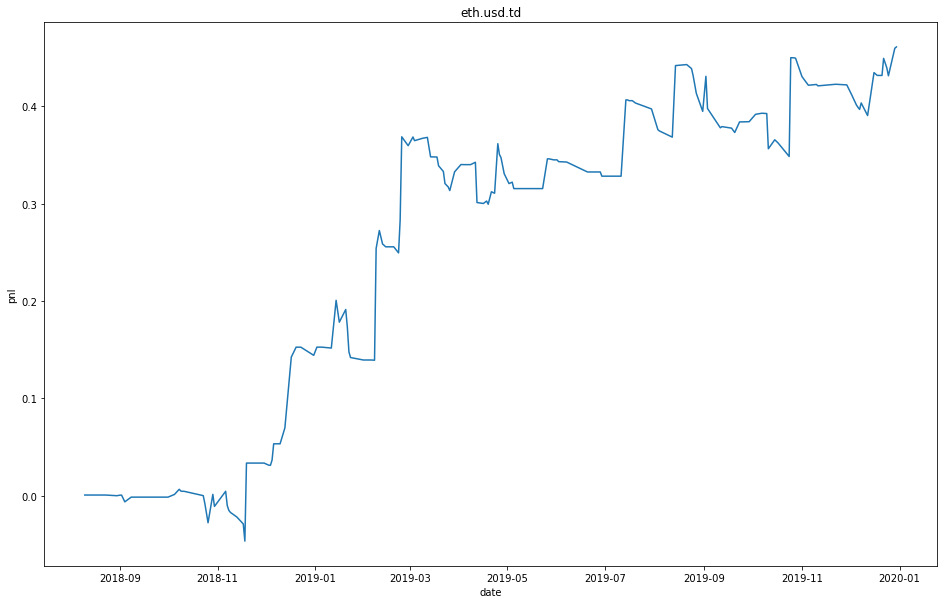

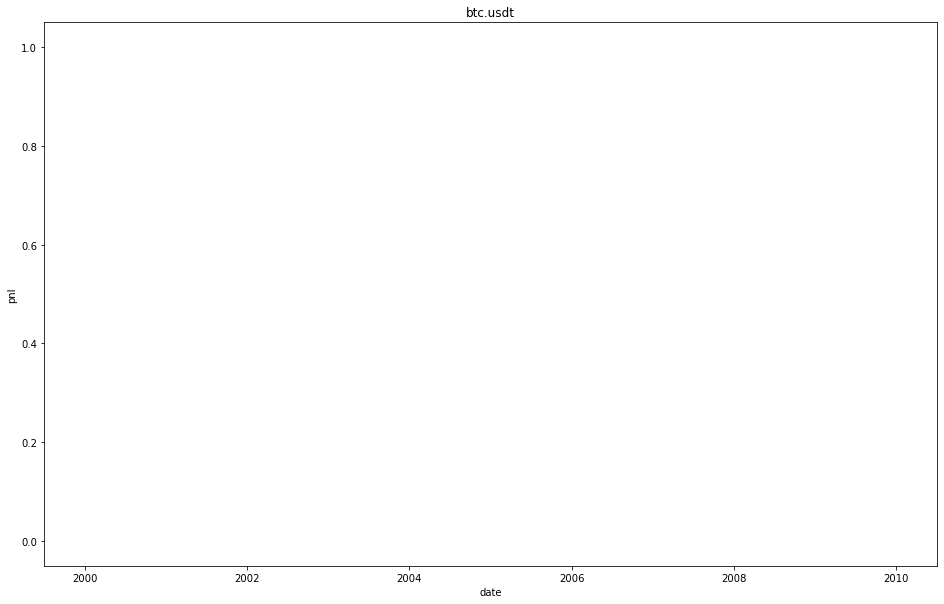

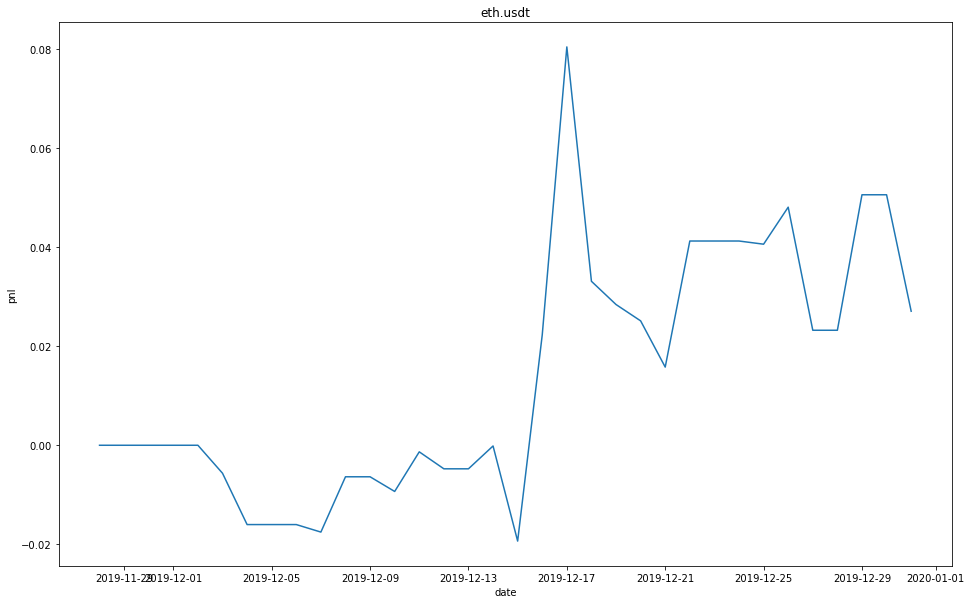

In [73]:
i = 0
all_trade_stat = load(HEAD_PATH+"/crypto_train_trade_stat.pkl")
for product in product_list:
    spread = product_info[product]["spread"]
    trade_stat = all_trade_stat[product]
    good_strat = (trade_stat["final.result"]["avg.pnl"]>2*spread) & (trade_stat["final.result"]["num"]>20)
    good_pnl = trade_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    i = i+1
    all_dates = np.array(list(map(lambda x: x,os.listdir(DATA_PATH + product))))
    date_str = [n[0:10] for n in all_dates]
    train_sample = all_dates<"2020"
    format_dates = np.array([pd.to_datetime(d) for d in date_str])
    plt.figure(i, figsize=(16, 10));
    plt.title("");
    plt.xlabel("date");
    plt.ylabel("pnl");
    plt.title(product);
    plt.plot(format_dates[train_sample], good_pnl.cumsum());


In [76]:
%%time
signal_name = "nr.4096"
test_trade_stat = dict([])
for product in product_list:
    spread = product_info[product]["spread"]
    tranct = product_info[product]["tranct"]
    tranct_ratio = product_info[product]["tranct.ratio"]
    all_dates = np.array(list(map(lambda x: x,os.listdir(DATA_PATH + product))))
    date_str = [n[0:10] for n in all_dates]
    format_dates = np.array([pd.to_datetime(d) for d in date_str])
    test_sample = all_dates>"2020"
    if (product=="btc.usd.td" or product=="eth.usd.td"):
        thre_mat = bitmex_thre_mat
    elif (product=="btc.usdt" or product=="eth.usdt"):
        thre_mat = binance_thre_mat
    with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
        f_par = functools.partial(get_signal_pnl, product=product, signal_name=signal_name, thre_mat=thre_mat,
                                 reverse=1, tranct=tranct, max_spread=spread*1.1, tranct_ratio=tranct_ratio, 
                                HEAD_PATH=HEAD_PATH, SAVE_PATH=SAVE_PATH,atr_filter=20)
        result = compute([delayed(f_par)(file) for file in all_dates[test_sample]])[0]
    trade_stat = get_hft_summary(result, thre_mat, sum(test_sample))
    test_trade_stat[product] = trade_stat

## Wall time: 10min 5s


Wall time: 10min 5s


In [77]:
save(test_trade_stat, HEAD_PATH+"/crypto_test_trade_stat.pkl")

- now we get the out-of-sample test result

In [85]:
train_trade_stat= load(HEAD_PATH+"/crypto_train_trade_stat.pkl")
test_trade_stat= load(HEAD_PATH+"/crypto_test_trade_stat.pkl")

btc.usd.td train sharpe  0.2629454407274443 test sharpe  1.3501073167296793
eth.usd.td train sharpe  1.964377667798774 test sharpe  -1.8495860466961593
btc.usdt train sharpe  nan test sharpe  nan
eth.usdt train sharpe  0.6952090948150514 test sharpe  0.9565201296626937


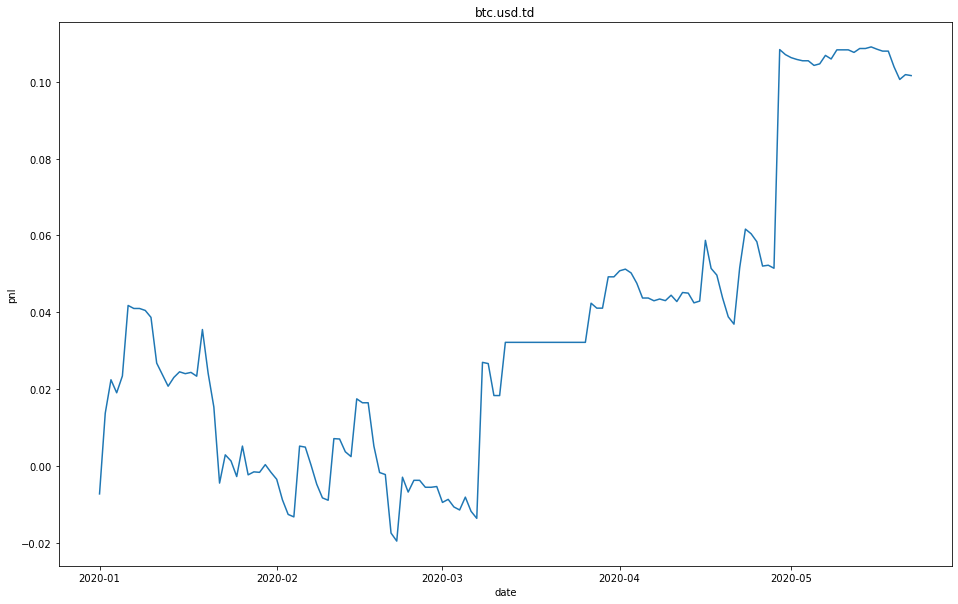

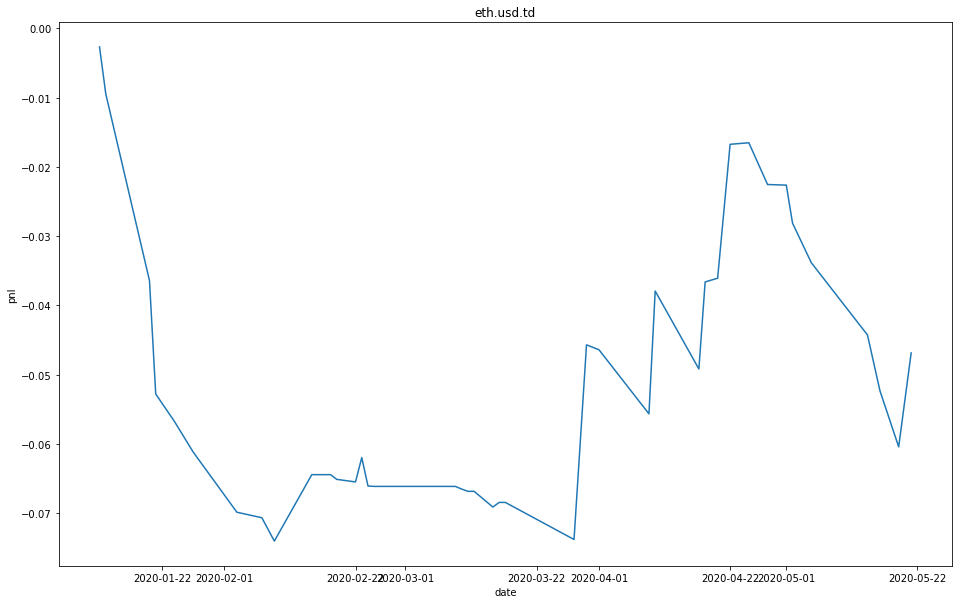

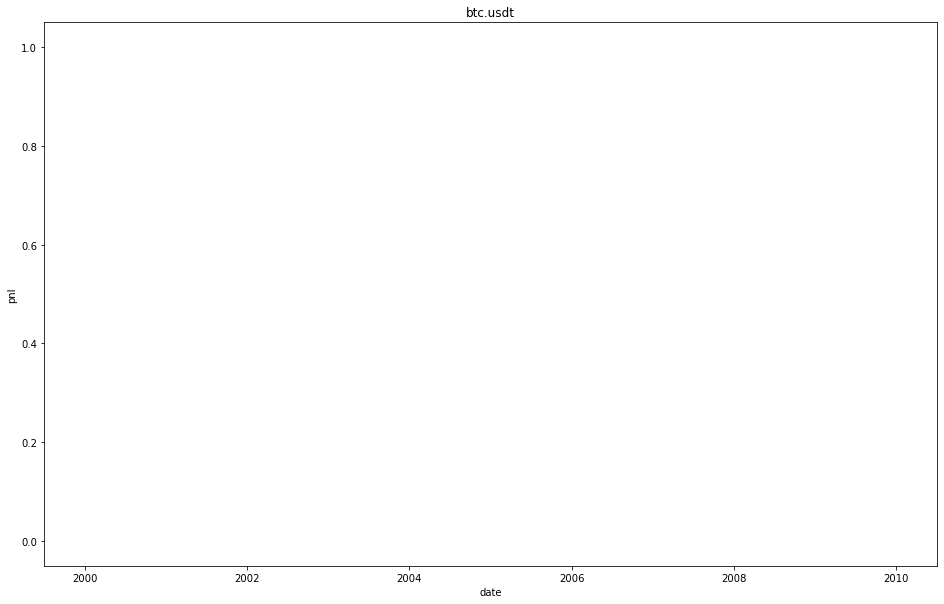

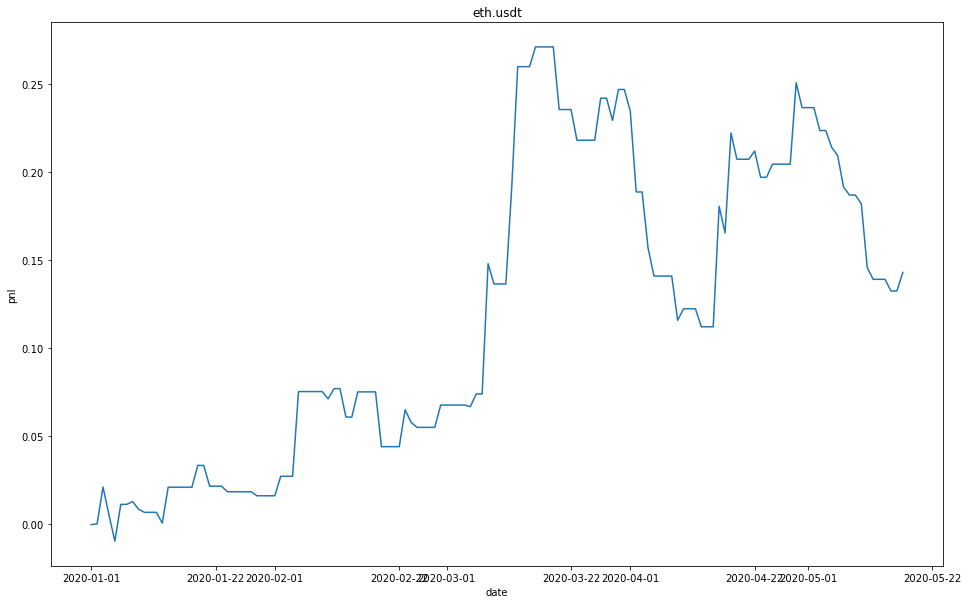

In [86]:
i = 0
for product in product_list[0:4]:
    spread = product_info[product]["spread"]
    all_dates = np.array(list(map(lambda x: x,os.listdir(DATA_PATH + product))))
    date_str = [n[0:10] for n in all_dates]
    format_dates = np.array([pd.to_datetime(d) for d in date_str])
    train_sample = all_dates<"2020"
    trade_stat = train_trade_stat[product]
    good_strat = (trade_stat["final.result"]["avg.pnl"]>2*spread) & (trade_stat["final.result"]["num"]>20)
    train_pnl = trade_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    trade_stat = test_trade_stat[product]
    test_pnl = trade_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    print(product, "train sharpe ", sharpe(train_pnl), "test sharpe ", sharpe(test_pnl))
    test_sample = all_dates>"2020"
    i = i+1
    plt.figure(i, figsize=(16, 10));
    plt.title("");
    plt.xlabel("date");
    plt.ylabel("pnl");
    plt.title(product);
    plt.plot(format_dates[test_sample], test_pnl.cumsum());
    
# btc.usd.td train sharpe  0.2629454407274443 test sharpe  1.3501073167296793
# eth.usd.td train sharpe  1.964377667798774 test sharpe  -1.8495860466961593
# btc.usdt train sharpe  nan test sharpe  nan
# eth.usdt train sharpe  0.6952090948150514 test sharpe  0.9565201296626937




- now calculate the result of test samples

- Homework:
- you can try using total.trade.imb.4096 to test again
- you can try using 1024/2048 to repeat this process and compare the result
- you can change the atr threshold of 20 to other values
- you can change the split of train/test samples
- you can try using reverse=1 and -1